This Notebook has the code of the data processing and analysis that was performed over the dataset to get the best model based on its prediction score, the model is saved and then is used on the "app.py" script to get a prediction based on the values that the user inputs in the app.

In [1]:
import pandas as pd                    #For data processing 
import seaborn as sns                 #For data analysis and plotting 
from matplotlib import pyplot as plt  #For data analysis and plotting 
import numpy as np
from sklearn.metrics import confusion_matrix       #For data analysis
from sklearn.metrics import plot_confusion_matrix  #For data analysis
import pickle                                      #To save the models

In [2]:
path_train = 'train.csv'
path_test = 'test.csv'
scores = {} #To store values of scores for each model, and select the one with the best score
models = {} #To store models

train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

In [3]:
def getbestmodel(scores): #For selecting the best model 
    maxscore = 0
    bestmodel = ''
    for model, score in scores.items():
        if score > maxscore:
            bestmodel = model
            maxscore = score
    return bestmodel

# #Preprocessing the dataset

In [4]:
print(list(train))  #Print column names from the dataframe
print(train.head(10)) #Get a look from the first rows from the dataframe
print(train.dtypes) #Print data column types

desc = train.describe()
print(desc) #Print statistical description of the dataframe

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  

In [5]:
print("################## Printing the amount of na values in the TRAIN dataframe")
print(train.isnull().sum()) #Print the amount of missing values per column

#Filling the missing NUMERICAL values for the mean of each column for the TRAIN dataframe
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mean())

#Filling the missing CATEGORICAL values for the mean of each column for the TRAIN dataframe
testseries = train['Gender'].mode()
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])        
'''Otra forma de escribir la línea anterior
train.Gender.fillna(train.Gender.mode()[0], inplace=True)'''
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])      
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])     
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

print("############### After filling the na values for the TRAIN dataframe")
print(train.isnull().sum()) #Print the amount of missing values per column

################## Printing the amount of na values in the TRAIN dataframe
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
############### After filling the na values for the TRAIN dataframe
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [6]:
print("################## Printing the amount of na values in the TEST dataframe")
print(test.isnull().sum()) #Print the amount of missing values per column

#Filling the missing NUMERICAL values for the mean of each column for the TEST dataframe
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mean())

#Filling the missing CATEGORICAL values for the mean of each column for the TEST dataframe
testseries = test['Gender'].mode()
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])         #Si no se le agrega el [0] no los sustituye, por????
'''Otra forma de escribir la línea anterior
test.Gender.fillna(test.Gender.mode()[0], inplace=True)'''
test['Married'] = test['Married'].fillna(test['Married'].mode()[0])      #Si no se le agrega el [0] no los sustituye, por????
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])     #Si no se le agrega el [0] no los sustituye, por????
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

print("############### After filling the na values for the Test dataframe")
print(test.isnull().sum()) #Print the amount of missing values per column


################## Printing the amount of na values in the TEST dataframe
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64
############### After filling the na values for the Test dataframe
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [7]:
#Removing loan ID variable, since is not relevant to the analysis
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

# #EXPLORATORY DATA ANALYSIS

---Visualization of categorical attributes

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

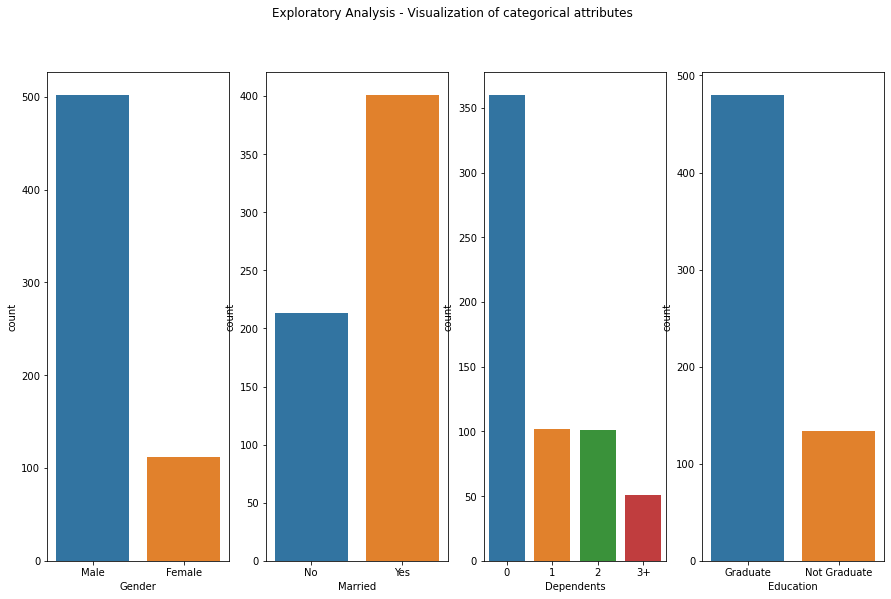

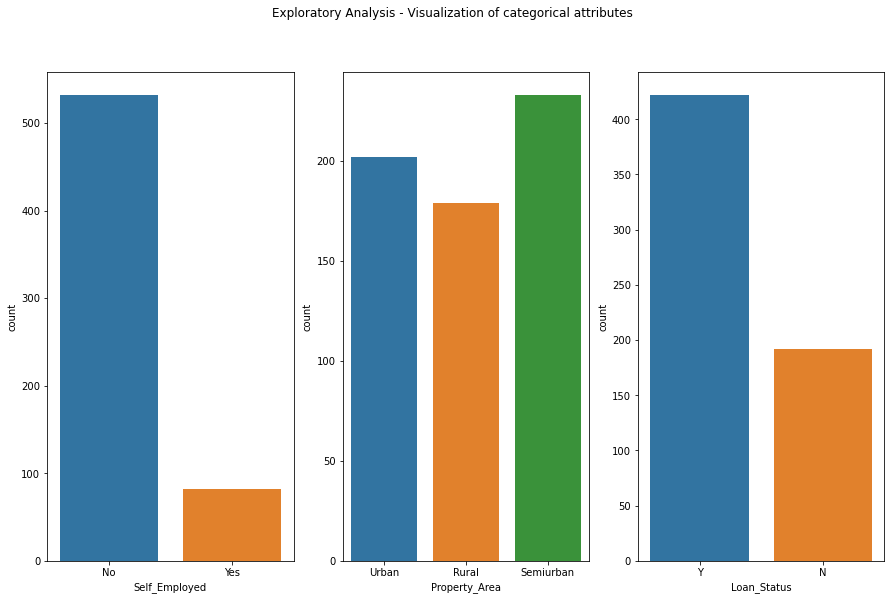

In [9]:
#---Visualization of categorical attributes
#print(type(train['Gender']))
#print(type(pd.DataFrame(train['Gender'])))

fig1, axes1 = plt.subplots(1, 4, sharey=False, figsize=(15, 9))
fig1.suptitle('Exploratory Analysis - Visualization of categorical attributes')
fig2, axes2 = plt.subplots(1, 3, sharey=False, figsize=(15, 9))
fig2.suptitle('Exploratory Analysis - Visualization of categorical attributes')

sns.countplot(ax=axes1[0], x = 'Gender', data=pd.DataFrame(train['Gender']))
sns.countplot(ax=axes1[1], x = 'Married', data=pd.DataFrame(train['Married']))
sns.countplot(ax=axes1[2], x = 'Dependents', data=pd.DataFrame(train['Dependents']))
sns.countplot(ax=axes1[3], x = 'Education', data=pd.DataFrame(train['Education']))
sns.countplot(ax=axes2[0], x = 'Self_Employed', data=pd.DataFrame(train['Self_Employed']))
sns.countplot(ax=axes2[1], x = 'Property_Area', data=pd.DataFrame(train['Property_Area']))
sns.countplot(ax=axes2[2], x = 'Loan_Status', data=pd.DataFrame(train['Loan_Status']))


---Visualization of numerical attributes

C:\Users\gablj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gablj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gablj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

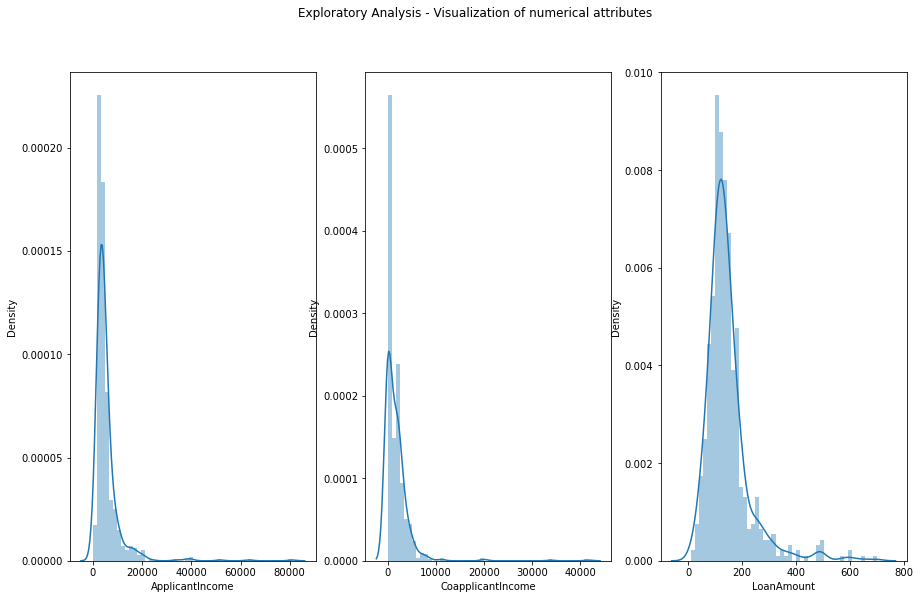

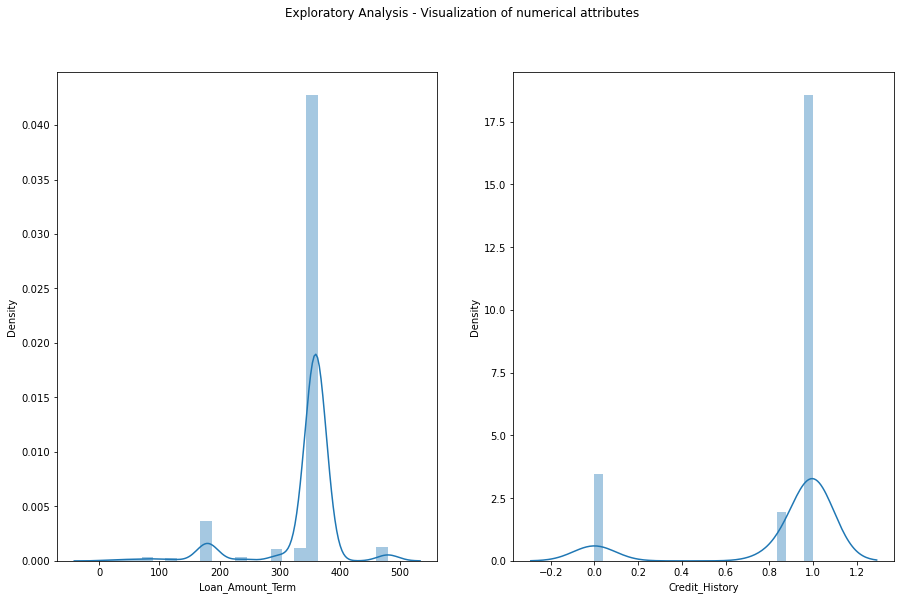

In [11]:
fig3, axes3 = plt.subplots(1, 3, sharey=False, figsize=(15, 9))
fig3.suptitle('Exploratory Analysis - Visualization of numerical attributes')
fig4, axes4 = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(15, 9))
fig4.suptitle('Exploratory Analysis - Visualization of numerical attributes')

sns.distplot(ax=axes3[0], a=train['ApplicantIncome'])
sns.distplot(ax=axes3[1], a=train['CoapplicantIncome'])
sns.distplot(ax=axes3[2], a=train['LoanAmount'])
sns.distplot(ax=axes4[0], a=train['Loan_Amount_Term'])
sns.distplot(ax=axes4[1], a=train['Credit_History'])

C:\Users\gablj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gablj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gablj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='LoanAmountTermLog', ylabel='Density'>

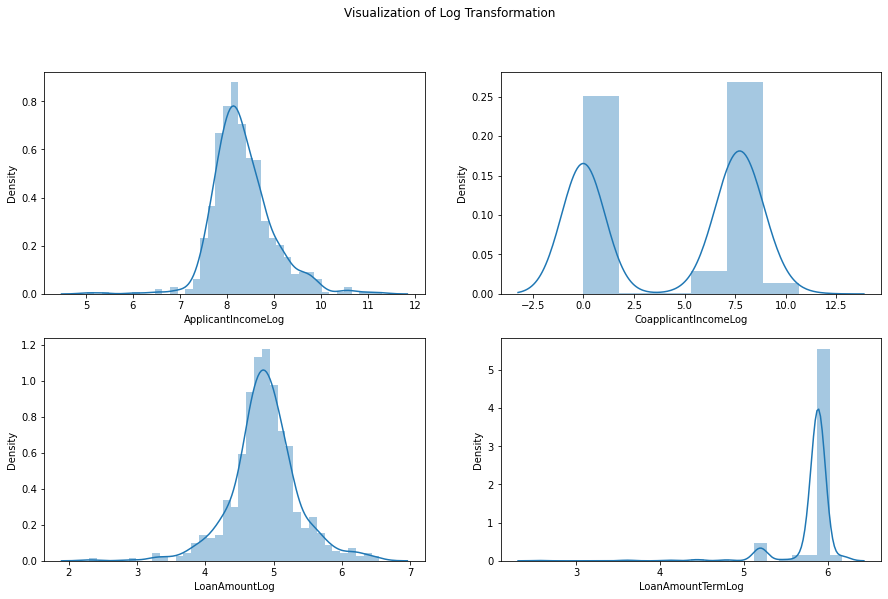

In [13]:
#Log Transformation - To normalize distribution, it's neccesary to have a normal distribution for some of the ml algorithms to perform accurately
train['ApplicantIncomeLog'] = np.log(train.ApplicantIncome + 1)
train['CoapplicantIncomeLog'] = np.log(train.CoapplicantIncome + 1)
train['LoanAmountLog'] = np.log(train.LoanAmount + 1)
train['LoanAmountTermLog'] = np.log(train.Loan_Amount_Term + 1)

fig5, axes5 = plt.subplots(2, 2, sharex=False, sharey=False, figsize=(15, 9))
fig5.suptitle('Visualization of Log Transformation')

sns.distplot(ax=axes5[0][0], a= train['ApplicantIncomeLog'])
sns.distplot(ax=axes5[0][1], a= train['CoapplicantIncomeLog'])
sns.distplot(ax=axes5[1][0], a= train['LoanAmountLog'])
sns.distplot(ax=axes5[1][1], a= train['LoanAmountTermLog'])

<AxesSubplot:>

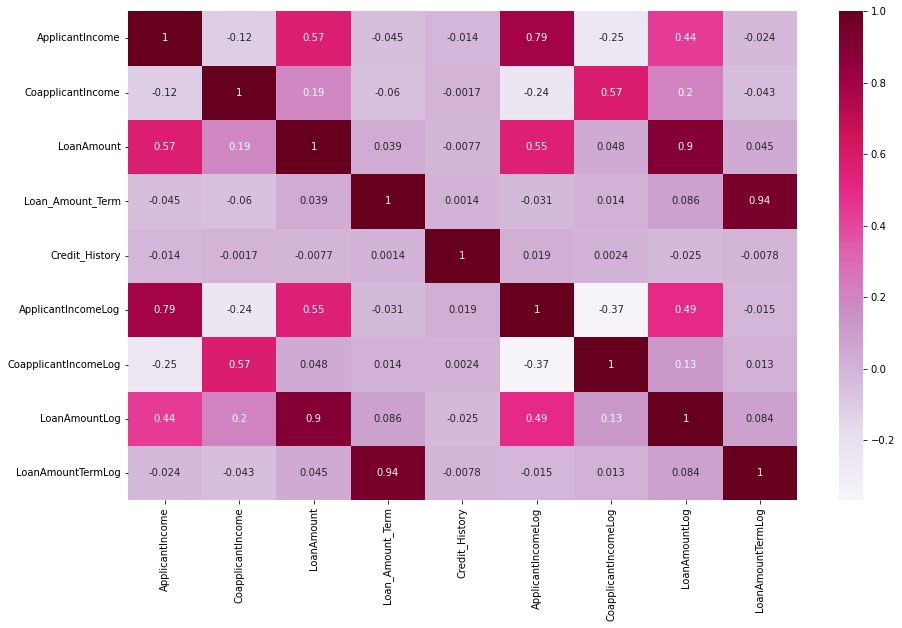

In [14]:
#-------Correlation Matrix - To check correlation between features and to drop features with poor correlation
CorrMatrix = train.corr()
#print(CorrMatrix)
fig6 = plt.figure(figsize=(15, 9))
sns.heatmap(CorrMatrix, annot=True, cmap='PuRd')

<AxesSubplot:>

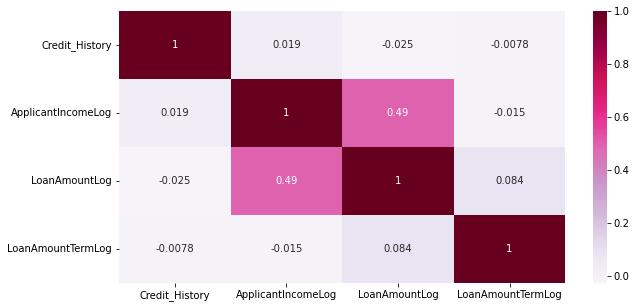

In [15]:
#Dropping unnecessary columns based on the correlation matrix results
todrop = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'CoapplicantIncomeLog']
train = train.drop(columns = todrop, axis=1)
CorrMatrix1 = train.corr()
fig7 = plt.figure(figsize=(10, 5))
sns.heatmap(CorrMatrix1, annot=True, cmap='PuRd')

In [16]:
#Encoding labes from non numerical values, including "Dependents" column since it has values the value "3+" that is not recognized as numerical
from sklearn.preprocessing import LabelEncoder
columns = ['Gender','Dependents', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
ledict = {"Gender":LabelEncoder(), "Dependents":LabelEncoder(), "Married":LabelEncoder(), "Education":LabelEncoder(), "Self_Employed":LabelEncoder(), "Property_Area":LabelEncoder(), "Loan_Status":LabelEncoder()}

for col in columns:
    train[col] = ledict[col].fit_transform(train[col])
#train.head(10)

inverse = pd.DataFrame(columns=columns)
for col in columns:
    inverse[col] = train[col]
for col in columns:
    inverse[col] = ledict[col].inverse_transform(inverse[col])

In [17]:
#Selecting input and output attributes
X = train.drop(columns=['Loan_Status'], axis=1)
y = train.Loan_Status

#Splitting train data for cross validation of trained models
from sklearn.model_selection import train_test_split
X_train, X_crossv, y_train, y_crossv = train_test_split(X, y, test_size=0.25)

# #####################------ Model Training

------------Using Logistic Regression to train the model

logreg score = 0.7922077922077922
confusion matrix = 
[[0.41176471 0.58823529]
 [0.01941748 0.98058252]]



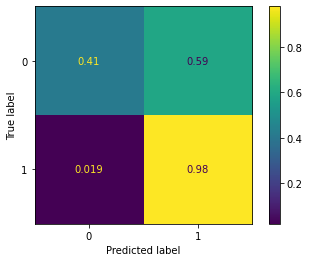

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
pred_logreg = logreg.predict(X_crossv)
confmatrix_logreg = confusion_matrix(y_crossv, pred_logreg, normalize='true')
logreg_score = logreg.score(X_crossv, y_crossv)
scores[logreg] = logreg_score #Adding model score to dictionary
models['logreg'] = logreg
pickle.dump(logreg, open("logreg.pkl", "wb")) #Saving the trained model

print(f"logreg score = {logreg_score}" )
plot_confusion_matrix(logreg, X_crossv, y_crossv, normalize='true')
print(f"confusion matrix = \n{confmatrix_logreg}\n")

------------Using Decision Tree to train the model

dectree score = 0.6623376623376623
confusion matrix = 
[[0.49019608 0.50980392]
 [0.25242718 0.74757282]]



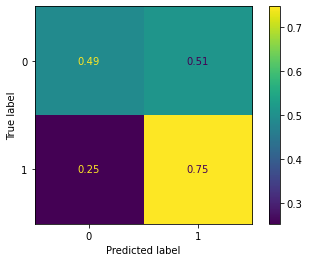

In [20]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier().fit(X_train, y_train)
pred_dectree = dectree.predict(X_crossv)
confmatrix_dectree = confusion_matrix(y_crossv, pred_dectree, normalize='true')
dectree_score = dectree.score(X_crossv, y_crossv)
scores[dectree] = dectree_score #Adding model score to dictionary
models['dectree'] = dectree
pickle.dump(dectree, open("dectree.pkl", "wb")) #Saving the trained model

print(f"dectree score = {dectree_score}" )
plot_confusion_matrix(dectree, X_crossv, y_crossv, normalize='true')
print(f"confusion matrix = \n{confmatrix_dectree}\n")

------------Using Suppert Vector Machines to train the model

svm score = 0.7922077922077922
confusion matrix = 
[[0.41176471 0.58823529]
 [0.01941748 0.98058252]]



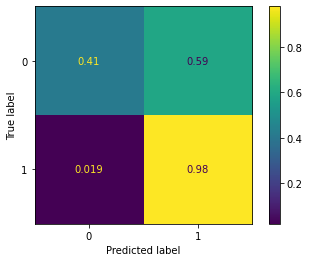

In [21]:
from sklearn.svm import SVC
svmclf = SVC(kernel='linear').fit(X_train, y_train)
pred_svmclf = svmclf.predict(X_crossv)
confmatrix_svmclf = confusion_matrix(y_crossv, pred_svmclf, normalize='true')
svmcl_score = svmclf.score(X_crossv, y_crossv)
scores[svmclf] = svmcl_score #Adding model score to dictionary
models['svmclf'] = svmclf
pickle.dump(svmclf, open("svmclf.pkl", "wb")) #Saving the trained model

print(f"svm score = {svmcl_score}" )
plot_confusion_matrix(svmclf, X_crossv, y_crossv, normalize='true')
print(f"confusion matrix = \n{confmatrix_svmclf}\n")

------------Using Gradient Boosting to train the model

gradient boosting score = 0.7337662337662337
confusion matrix = 
[[0.43137255 0.56862745]
 [0.11650485 0.88349515]]



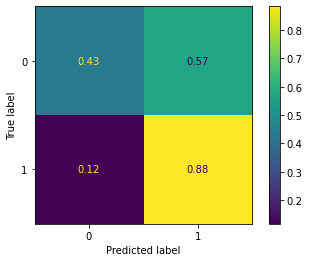

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gradboost = GradientBoostingClassifier().fit(X_train, y_train)
pred_gradboost = gradboost.predict(X_crossv)
confmatrix_gradboost = confusion_matrix(y_crossv, pred_gradboost, normalize='true')
gradboost_score = gradboost.score(X_crossv, y_crossv)
scores[gradboost] = gradboost_score #Adding model score to dictionary
models['gradboost'] = gradboost
pickle.dump(gradboost, open("gradboost.pkl", "wb")) #Saving the trained model

print(f"gradient boosting score = {gradboost_score}" )
plot_confusion_matrix(gradboost, X_crossv, y_crossv, normalize='true')
print(f"confusion matrix = \n{confmatrix_gradboost}\n")

------------Using K Nearest Neighbors to train the model

k nearest neighbors score = 0.7142857142857143
confusion matrix = 
[[0.25490196 0.74509804]
 [0.05825243 0.94174757]]



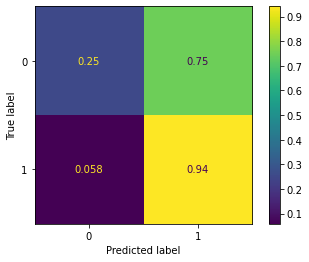

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
pred_knn = knn.predict(X_crossv)
confmatrix_knn = confusion_matrix(y_crossv, pred_knn, normalize='true')
knn_score = knn.score(X_crossv, y_crossv)
scores[knn] = knn_score #Adding model score to dictionary
models['knn'] = knn
pickle.dump(knn, open("knn.pkl", "wb")) #Saving the trained model

print(f"k nearest neighbors score = {knn_score}" )
plot_confusion_matrix(knn, X_crossv, y_crossv, normalize='true')
print(f"confusion matrix = \n{confmatrix_knn}\n")

-----------Selecting the best model 

In [24]:
print(f"scores = {scores}\n")
print(f"models = {models}\n")
best_model = getbestmodel(scores)
pickle.dump(best_model, open("best_model.pkl", "wb")) #Saving the trained model
print(f"best model = {best_model} , best model score = {scores[best_model]}")

print(best_model)

scores = {LogisticRegression(): 0.7922077922077922, DecisionTreeClassifier(): 0.6753246753246753, DecisionTreeClassifier(): 0.6623376623376623, SVC(kernel='linear'): 0.7922077922077922, GradientBoostingClassifier(): 0.7337662337662337, KNeighborsClassifier(): 0.7142857142857143}

models = {'logreg': LogisticRegression(), 'dectree': DecisionTreeClassifier(), 'svmclf': SVC(kernel='linear'), 'gradboost': GradientBoostingClassifier(), 'knn': KNeighborsClassifier()}

best model = LogisticRegression() , best model score = 0.7922077922077922
LogisticRegression()
